<a href="https://colab.research.google.com/github/leiweiyen/machinelearning/blob/master/Week4_pat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Week 4
### Multi-class Classification and Neural Networks

In [0]:
import scipy as scp 
from scipy import io
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
import math
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Part 1: Loading and Visualizing Data

In [0]:
mat_contents = io.loadmat('../content/drive/My Drive/Machine Learning/ex3data1.mat')
X = mat_contents['X']
y = mat_contents['y']

m = X.shape[0]
rand_indicies = np.random.permutation(m)-1
sel = X[rand_indicies[0:100],:]


In [0]:
def display_data(X, example_width=None):
    num_digits, num_pixels = X.shape[0], X.shape[1]
    if example_width is None: 
        example_width = np.round(np.sqrt(num_pixels)).astype(int)  # assume square image
    
    example_height = num_pixels // example_width  # width * height = total number of pixels


    # num rows to draw is square root of total training examples
    num_rows_to_display = np.floor(np.sqrt(num_digits)).astype(int)
    # number of cols is also roughly square root of total training examples
    num_cols_to_display = np.ceil(num_digits / num_rows_to_display).astype(int)

    num_images = (num_rows_to_display * num_cols_to_display).astype(int)

    for i in range(num_images):
      image = X[i,:].reshape(example_height, example_width,order='F')  # not sure which one should be width/height
      plt.subplot(num_rows_to_display, num_cols_to_display, i + 1)  # subplot uses 1-based indexing, so + 1
      plt.imshow(image, cmap='gray')
      plt.axis('off')
      plt.tight_layout()
    return

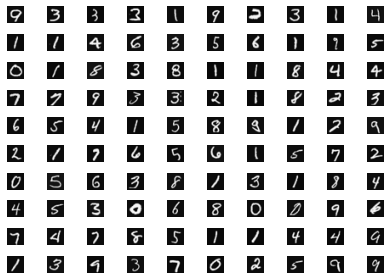

In [0]:
display_data(sel)

### Part 2a: Vectorize Logistic Regression

In [0]:
theta_t = np.array([[-2],[-1],[1],[2]])
X_t1 = np.ones((5,1))
X_t2 = (np.arange(15)+1).reshape((5,3),order='F')/10
X_t = np.concatenate([X_t1,X_t2],axis=1)
lambda_t = 3
y_t = np.array([[1],[0],[1],[0],[1]])

def sigmoid(z):
  g = 1/(1+np.exp(-z))
  return g 

def lrCostFunction(theta_t,X_t,y_t,lambda_t):
  m = y_t.shape[0]
  Xtheta = np.multiply(np.transpose(theta_t),X_t)
  print(Xtheta)
  h = sigmoid(Xtheta)
  sum_int = np.multiply(-y_t,np.log(h))-(np.multiply(1-y_t,np.log(1-h)))
  J = np.sum(sum_int)/m
  grad = 0

  return (J, grad)

lrCostFunction(theta_t,X_t,y_t,lambda_t)


[[-2.  -0.1  0.6  2.2]
 [-2.  -0.2  0.7  2.4]
 [-2.  -0.3  0.8  2.6]
 [-2.  -0.4  0.9  2.8]
 [-2.  -0.5  1.   3. ]]


(3.8711995270080144, 0)